In [5]:
import pandas as pd
import numpy as np
from scipy import stats
import function
import pandasql
import sqlite3
from IPython.display import clear_output
import datetime


In [2]:
df = pd.read_excel('VisitorEntrancesV3.xlsx')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75165 entries, 0 to 75164
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     75165 non-null  datetime64[ns]
 1   Site_Name                75165 non-null  object        
 2   Israelis_Count           75165 non-null  int64         
 3   region_Central           75165 non-null  int64         
 4   region_Judea_Samaria     75165 non-null  int64         
 5   region_North             75165 non-null  int64         
 6   region_South             75165 non-null  int64         
 7   is_weekend               75165 non-null  int64         
 8   is_camping               75165 non-null  int64         
 9   special_activity         75165 non-null  int64         
 10  visit_duration           75165 non-null  int64         
 11  is_nationalPark          75165 non-null  int64         
 12  is_natureReserve         75165 n

<AxesSubplot:>

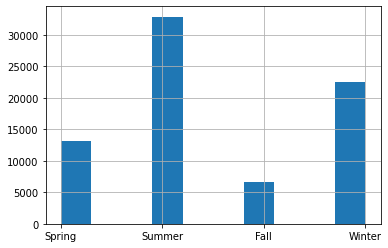

In [17]:
df['SEASON'].hist()

In [52]:
season = {11:'Winter',12:'Winter',1:'Winter',2:'Winter',3:'Spring',4:'Spring',5:'Summer',6:'Summer',7:'Summer',8:'Summer',9:'Fall',10:'Fall'}
df['SEASON'] = pd.DatetimeIndex(df['Date']).month.map(season)
df['Year'] = pd.DatetimeIndex(df['Date']).year



In [58]:
d = pd.get_dummies(df[['Israelis_Count','SEASON','Year']],prefix='').pivot_table(index=['Year'],columns=['_Winter','_Summer','_Fall','_Spring'],values='Israelis_Count',aggfunc=[np.mean])
d.columns = ['Spring','Fall','Summer','Winter']
d = d[['Fall','Winter','Spring','Summer']]
d

,Fall,Winter,Spring,Summer
Year,,,,
2016,315.056669,200.914281,397.688694,302.250642
2017,333.542988,229.487915,395.606903,326.107988
2018,319.115844,216.684540,439.910501,318.925870
2019,348.137534,240.564951,419.537105,380.020234


In [57]:
pd.get_dummies(df[['Israelis_Count','SEASON','Year']],prefix='').corr()

,Israelis_Count,Year,_Fall,_Spring,_Summer,_Winter
Israelis_Count,1.000000,0.035549,0.014971,0.092120,0.027990,-0.117914
Year,0.035549,1.000000,0.010593,0.011526,0.006259,-0.024841
_Fall,0.014971,0.010593,1.000000,-0.210532,-0.338295,-0.299383
_Spring,0.092120,0.011526,-0.210532,1.000000,-0.339378,-0.300341
_Summer,0.027990,0.006259,-0.338295,-0.339378,1.000000,-0.482605
_Winter,-0.117914,-0.024841,-0.299383,-0.300341,-0.482605,1.000000
